# Домашнее задание 2 (20 + 40 = 60 pts )

## Задача 1 (20 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).

In [1]:
# Место для Вашего решения

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

Использовалось: https://www.ime.unicamp.br/~cnaber/Kronecker.pdf

По определению, если $A = [a_1 a_2 ... a_n]$ , то 
$ vec(A) = \begin{bmatrix} a_1 \\ a_2 \\ ... \\ a_n \end{bmatrix}$

Пусть матрица $B = \begin{bmatrix} b_{11} & b_{12} & ... & b_{1n} \\ b_{21} & b_{22} & ... & b_{2n} \\ ...& & & \\  b_{m1} & b_{m2} & ... & b_{mn} \end{bmatrix} = [b_1 b_2 ... b_n] $ m на n 

$X = [x_1 x_2 .. x_m]$
Рассматроим k-ый солбец матрицы $AXB$:

$(AXB)_k = A(Xb_k) = A \sum_{i=1}^m x_i b_{ik} = [b_{1k} A, b_{2k} A, ..., b_{mk} A] \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_m \end{bmatrix} = $
 
Последний множитель это, очевидно, $vec(X)$

$= ([b_{1k}, b_{2k}, ..., b_{mk}] \otimes A) vec(X) = (b^T_k \otimes A) vec(X)$

Складывая столбцы вместе:

$\mathrm{vec}(AXB) = \begin{bmatrix} (AXB)_1 \\ (AXB)_2 \\ ... \\ (AXB)_n \end{bmatrix} = \begin{bmatrix} b^T_1 \otimes A \\ b^T_2 \otimes A \\ ... \\ b^T_n \otimes A \end{bmatrix} vec(X) = (B^\top \otimes A)\, \mathrm{vec}(X) $

Если использовать векторизацию по строкам:
$$
\mbox{vec}_r (AXB) = \mbox{vec}(B^T X^T A^T) = (A \otimes B^T)\mbox{vec} (X^T) = (A \otimes B^T) \mbox{vec}_r X
$$

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

Пусть $A \in \mathbb{R}_{n \times m}$, $B \in \mathbb{R}_{k \times l}$
$x \in \mathbb{R}_{ml \times 1}$, $X \in \mathbb{R}_{l \times m}$ 

Сложность умножения $(A \otimes B)x$ это $\mathcal{O}(nkml) = O(n^4)$ 

Пусть $x$ = vec($X$), тогда:
$$ (A \otimes B) \mbox{vec}(X) = \mbox{vec}(BXA^T) $$
Сложность $\mbox{vec}(BXA^T)$ это $\mathcal{O}((n+l)km) = O(n^3) $

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

Пусть $Ax=\lambda_A x$ и $By=\lambda_B y$ 

$A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$ . 
Столбцы $S_A$ - это собственые векторы, а в $\Lambda_A$  на диагонали лежат собственные значения матрицы  $A$.

Используя свойства из методички приложенной выше:
1. $A \otimes (B + C) = (A \otimes B) + (A \otimes C)$
2. $(A \otimes B)(C \otimes D) = (AC \otimes BD)$


$
(S_A^{-1} \otimes S_B^{-1}) (A \otimes I + I \otimes B) (S_A \otimes S_B) = (S_A^{-1} \otimes S_B^{-1}) (A \otimes I) (S_A \otimes S_B) + (S_A^{-1} \otimes S_B^{-1}) (I \otimes B) (S_A \otimes S_B) =  $

$ = S_A^{-1} A S_A \otimes S^{-1}_B I S_B + S_A^{-1} I S_A \otimes S_B^{-1} B S_B = \\
= \Lambda_A \otimes I + I \otimes \Lambda_B = 
\begin{bmatrix}
(\lambda_A)_1 I & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & (\lambda_A)_n I
\end{bmatrix} +
\begin{bmatrix}
\Lambda_B & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & \Lambda_B
\end{bmatrix}, \,$ где

$\Lambda_B = 
\begin{bmatrix}
(\lambda_B)_1 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & (\lambda_B)_m
\end{bmatrix}
$
Значит, i-ое собственное число матрицы $A\otimes I + I \otimes B$ это сумма $(\lambda_A)_i + (\lambda_B)_1, (\lambda_A)_i + (\lambda_B)_2, ... ,(\lambda_A)_i + (\lambda_B)_n$
Собственные векторы соответственные столбцы матрицы $(S_A \otimes S_B) $
- $ (A\otimes I + I \otimes B)(x \otimes y)  = Ax \otimes y + x \otimes By = \lambda_A x \otimes y + x \otimes \lambda_By = (\lambda_{A} + \lambda_{B})(x \otimes y) $ собственные вектора

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).

In [2]:
import numpy as np
import math
q_1 = (1000-1/1000)/(1000+1/1000)
-4 / math.log(0.999998000002, 10)
A = np.zeros([1001, 1001])
for i in range(1000):
    for j in range(1000):
        A[i][i] = (i+1) / 1000
A[1000][1000] = 1000
np.linalg.cond(A)
q_2 = (math.sqrt(np.linalg.cond(A)) - 1) / (math.sqrt(np.linalg.cond(A)) + 1)
print(q_2)
print(-4 / math.log(0.998001998001998, 10))
print((-4 - math.log(2,10)) / math.log( 999 / 1001, 10))

print( (0.5 * math.sqrt(1000 / (1/1000))) * (math.log(2,10) + 4) )
print( 4 / 0.0008685892533363507 )


0.998001998001998
4605.168650930854
4951.742125686258
2150.5149978319905
4605.168650930854


   **метод Ричардсона с оптимальным параметром (используйте евклидову норму)**

$e_k = x_k - x_* $

$e_k \geq q^k e_0$

$e_0 = \|x_0 - x_*\|_2 $, пусть $x_0 = 0$, тогда $e_0 = \|x_*\|_2$

$10^{-4} \geq q^k e_0$

$q^k \leq 10^{-4} $

$k log q \leq -4$

$q = \frac{\lambda_{max}-\lambda_{min}}{\lambda_{max}+\lambda_{min}} = \frac{1000-\frac{1}{1000}}{1000+\frac{1}{1000}} =  0.999998000002$

$k \geq 4605170 - \log_q e_0 $

Пусть $e_0 = 1$

$k \geq 4605170 $

  **метод Чебышёва (используйте евклидову норму)**
    
 $e_{k+1} \geq C q^{k} e_0$

$q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1} = 0.998001998001998$

также пусть $x_0 = 0$, тогда $e_0 = \|x_*\|_2$

$e_k \geq C q^{k-1} e_0$

$\log{e_k} \geq \log{C} +  \log{q^{k-1}} + \log{e_0}$

$\log{e_k} - \log{C} - \log{e_0} \geq \log{q^{k-1}}$

Пусть $C = 1, e_0 = 1$

$-4 \geq  (k-1) * -0.0008685892533363507 $

$ 4605.168650930854 \leq  (k-1)$

$k \geq 4606$


   **метод сопряжённых градиентов (используйте $A$-норму)**

$
\frac{\|x_k - x_* \|_A}{\| x_* \|_A} \geq 2 \Big( \frac{\sqrt{\mbox{cond}(A)} - 1}{\sqrt{\mbox{cond}(A)} + 1} \Big)^k $

$ -4 \geq \log_(2 \Big( \frac{999}{1001} \Big)^k )= \log 2 + k \log_(\frac{999}{1001}) $

$ -4 - \log 2 \geq k \log_(\frac{999}{1001}) $

$k \leq \frac{-4 \log 2}{\log_(\frac{999}{1001})}  = 4952$

Можно улучшить результат: http://www.mat.uniroma2.it/~tvmsscho/Rome-Moscow_School/2012/files/T120910_.pdf

$ k \leq \frac{1}{2} \sqrt{\frac{\lambda_{n}}{\lambda_{1}}}(\log{2} - \log{\frac{e_k}{e_0} })$

$ k \leq 2151$


## Задача 2 (40 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

### Метод обратной итерации (15 pts)

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (5 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.
 
* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

Собственный вектор, соответствующий собственному значению 0, это вектор $e^T = [ 1 ... 1 ]$, потому что
Лапласиан $L = D - A$ графа $G$ с $n$ вершинами определяется как матрица $L$ с элементами

$
L_{ij} = \begin{cases}
d_{i}, \; & i = j, \\
-a_{ij}, \; & i \neq j,
\end{cases}
$

Cумма элементов в каждой строке равна $0$,вектор $e^T = [ 1 ... 1 ]$, является собственным вектором лапласиана, соответствующим собственному значению 0.

Найдем матрицу ортопроекции на пространство, ортогональное собственному вектору $e$. Пусть $V$ перпендикулярное к $e$ пространство, тогда ортопроекция произвольного вектора $c$:

$ c_{\bot} = c - c_{e} = I c - \frac{e e^T}{e^T e} c $

Следовательно, матрица ортопроекции:
$ P = I - \frac{e e^T}{e^T e} $

Проверим, взяв любой произвольный вектор $x^T$ = $[x_1 ... x_n]$:

$ Px = x - \frac{1}{n}
\begin{bmatrix}
\sum_i x_i \\
\vdots \\
\sum_i x_i \\
\end{bmatrix} = x - \frac{(x, e)}{(e,e)} e
$

In [3]:
import numpy as np
import scipy as sp
from scipy import sparse

import networkx as nx
from networkx.linalg.algebraicconnectivity import fiedler_vector

import matplotlib.pyplot as plt
from scipy.sparse import linalg

In [4]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def estimation_(eigs, eps):
    return (abs(eigs[-2] - eigs[-1]) / eigs[-1] <= eps)
    
def P_operator(x):
    return x - np.ones_like(x) * np.sum(x) / x.shape[0]

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x_k = x0 / np.linalg.norm(x0)
    eigs = np.array([0])
    L, I = nx.laplacian_matrix(nx.from_scipy_sparse_matrix(A)), sp.sparse.identity(x_k.shape[0])
    
    for _ in range(num_iter_fix):
        x_k = P_operator(x_k)
        x_k = sp.sparse.linalg.spsolve(L - shift * I, x_k)
        x_k /= np.linalg.norm(x_k, 2)
        eigs = np.append(eigs, np.dot(x_k, L.dot(x_k)))
        
        if estimation_(eigs, eps):
            return x_k, eigs
        
    for _ in range(num_iter_adapt):
        x_k = P_operator(x_k)
        x_k = sp.sparse.linalg.spsolve(L - np.dot(x_k, L.dot(x_k)) * I, x_k)
        x_k /= np.linalg.norm(x_k, 2)
        eigs = np.append(eigs, np.dot(x_k, L.dot(x_k)))
        
        if estimation_(eigs, eps):
            return x_k, eigs            
        
    return x_k, eigs

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

In [5]:
m, n = (10, 20)
G = nx.lollipop_graph(m, n)
A = nx.adjacency_matrix(G)
x0 = np.random.random((A.shape[0],)).astype(np.float64)

eigs_builtin = np.sort(np.linalg.eigh(nx.laplacian_matrix(G).todense())[0])
x, eigs = partition(A, 0.01, 10, 100, x0, 0.00001)

/Users/mariadonskova/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


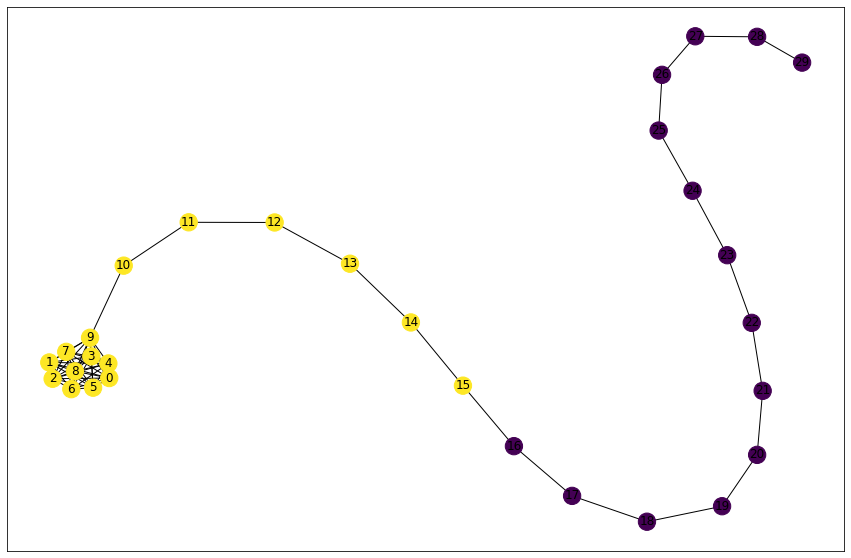

In [6]:
pos = nx.spring_layout(G)
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos, node_color=np.sign(x))

In [7]:
# Место для Вашего решения

In [8]:
x0 = np.random.random((A.shape[0],)).astype(np.float32)

eigs_builtin = np.sort(np.linalg.eigh(nx.laplacian_matrix(G).todense())[0])
x, eigs = partition(A, 1e-3, 0, 5, x0, 1e-5)
print(eigs_builtin[1], eigs[-1])

0.012734401114602275 1.1804696656284113


Без «сдвига» нет первого цикла, мы не делаем ортогональную проекцию, поэтому можем сходиться к собственному значению = 0 и его вектору. (Важно также большое число итераций)

### Спектральные свойства графа (15 pts)

* (5 pts) Докажите, что кратность собственного значения $0$ в спектре лапласиана графа равна числу связных компонент.
* (10 pts) Второе наименьшее собственное значение $L(G)$, $\lambda_2(L(G))$, часто называется алгебраической связностью графа $G$. 
За подобным использованием этого термина стоят следующие рассуждения: граф с большей алгебраической связностью обычно имеет больше рёбер и следовательно его можно считать "более связным".  
Для проверки этого утверждения создайте несколько графов с одинаковым числом вершин. 
Одним из них должен быть простой циклический граф $C_{30}$, а другим – полный граф $K_{30}$. (Вы также можете менять число вершин в ваших эксипериментах, если это имеет смысл, но не делайте его слишком маленьким). Используйте библиотку ```networkx``` для создания графов.
    * Найдите алгебраическую связность для каждого графа, используя метод обратной итерации (с переключением на метод Релея)
    * Нарисуйте зависимость $\lambda_2(G_i)$ от $|E_i|$ – количества вершин.
    * Нарисуйте разбиение нескольких графов из множества сгенерированных
    * Прокомментируйте результаты

In [9]:
# Место для Вашего решения

Использовалось: http://math.uchicago.edu/~may/REU2013/REUPapers/Marsden.pdf :

"G имеет k связанных компонент тогда и только тогда, когда его матрица смежности может быть блочно-диагональной с k блоками если и только если ее матрица Лапласа имеет k блоков.
Разделим $L$ на блоки $L_1, L_2, ..., L_k$

тогда $det(xI - L) = det(xI - L_1)det(xI - L_2)...det(xI - L_k)$, так что алгебраическая кратность 0 для всей матрицы Лапласа является суммой алгебраической кратности 0 каждого $L_i$. 

Если G имеет k связанных конпонент, тогда эта сумма равна 1 + ··· + 1 $k$ раз, те k. В другую сторону, если алгебраическая кратность лапласиана равна k, тогда сумма равна k, поэтому в лапласиане должно быть k блоков, и поэтому G должна иметь k связанных компонент. "

### Разбиение изображения на две части (10 pts)

Рассмотрим граф, полученный из бинаризованного изображения. Вершинами графа являются только пиксели, в которых стоит $1$. Также каждая вершина имеет не более 8 соседей, то есть степень каждой вершины графа ограничена 8.
* (3 pts) Найдите изображение минимального размера $(256, 256)$ и бинаризуйте его так, чтобы граф, построенный на основе чёрных пикселей имел в точности одну связную компоненту.
* (5 pts) Напишите функцию для построения разреженной матрицы смежности из бинаризованного изображения, имея в виду вышеописанные правила
* (2 pts) Найдите разбиение итогового графа и нарисуйте изображение в соответствии с этим разбиением. Объясните результат.

In [ ]:
# Место для Вашего решения

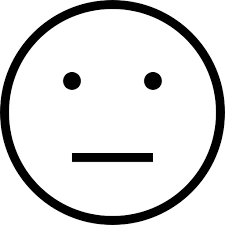

In [11]:
from PIL import Image
from itertools import product
img0 = Image.open("smile.png")
img0